# K-Means Clustering

## Importing the libraries

Here, we import NumPy, Scikit-learn, and Matplotlib to make our code shorter and more efficient!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

This dataset contains the "CustomerID", gender, Age, Annuam Income, and spending score of customers at a mall!

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

## Using the elbow method to find the optimal number of clusters

Here, we use the elbow clustering model to determine the best amount of clusters! As the rate of decrease changes at the 5th cluster, we know that 5 clusters are optimal for this data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

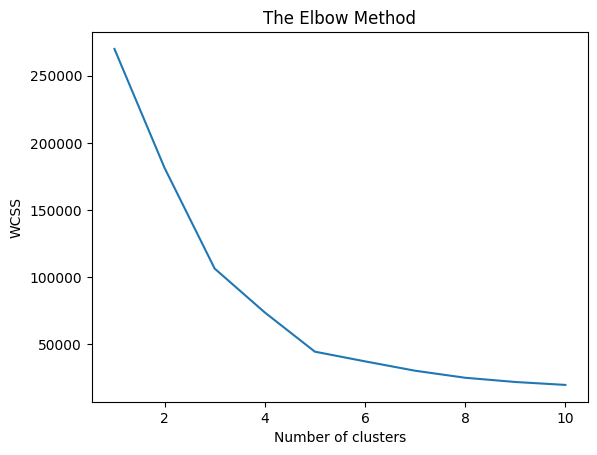

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

Here, we train the K-means clustering model on the dataset. First, we set the number of clusters to be 5, and set a random state of 42, the same as the one used in the elbow method. This ensures that the outcomes of this model are reproducable, as any random processes are standardized.

In [ ]:
    kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

Here, we visualise the clusters, which create groups of customers that are similar to each other! This allows us to target specific marketing campaigns to each group of customers!

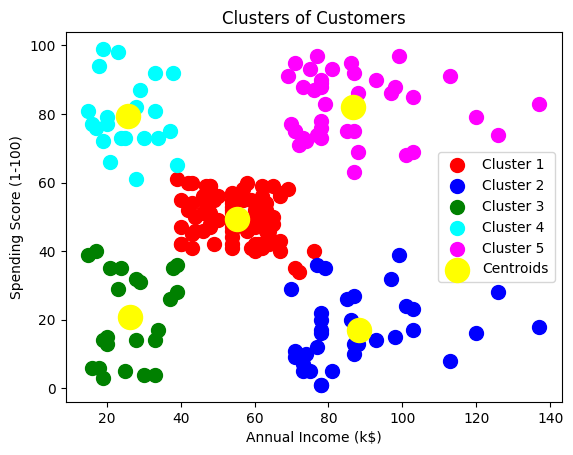

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1 ')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2 ')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3 ')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4 ')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5 ')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()